Translation Model: The code uses Hugging Face's mBART model (facebook/mbart-large-50-many-to-many-mmt) for translating the English caption into Hindi (or other Indian languages like Tamil, Bengali, etc.).

Language Mapping: Language codes are mapped to mBART-supported language codes (e.g., 'hi_IN' for Hindi, 'ta_IN' for Tamil).

Text-to-Speech: After translation, the text is converted into speech using gTTS for the specified language (lang_code='hi' for Hindi).

Dynamic Language Support: The text-to-speech class (TextToSpeech) dynamically adjusts the language of the narration based on the selected language code (e.g., 'hi' for Hindi, 'ta' for Tamil). Whsiper model is used.

In [ ]:
!pip install torch transformers pillow whisper indic-nlp-library soundfile

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.7/572.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 8.6 MB/s eta 0:00:00
  Created wheel for whisper: filename=whisper-1.1.10-py3-none-any.whl size=41120 sha256=07179dc3cd5c9606ad0f12e5a34eb8a383fd34e2fc432094a72958b68f0e1963
  Stored in directory: /root/.cache/pip/wheels/aa/7c/1d/015619716e2facae6631312503baf3c3220e6a9a3508cb14b6
Successfully built whisper
  Attempting uninstall: docutils
    Found existing installation: docutils 0.18.1
    Uninstalling docutils-0.18.1:
      Successfully uninstalled docutils-0.18.1
  Attempting uninstall: sphinx
    F

In [ ]:
!pip install git+https://github.com/openai/whisper.git


  Cloning https://github.com/openai/whisper.git to /tmp/pip-req-build-y7podlav
  Running command git clone --filter=blob:none --quiet https://github.com/openai/whisper.git /tmp/pip-req-build-y7podlav
  Resolved https://github.com/openai/whisper.git to commit 279133e3107392276dc509148da1f41bfb532c7e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.4/209.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 36.9 MB/s eta 0:00:00
  Created wheel for openai-whisper: filename=openai_whisper-20231117-py3-none-any.whl size=802819 sha256=e58ce3b001554b966ff43143dd40ea5ec6c611a091e22c0e85241e076ed41090
  Stored in directory: /tmp/pip-ephem-wheel-cache-t9fn76s8/wheels/8b/6c/d0/622666868c179f156cf595c8b6f06f88bc5d80c4b31dccaa03
Successfully built openai-whisper


In [ ]:
!pip install transformers #for checking again if transformers is installed or not


In [ ]:
import whisper

class TextToSpeech:
    def __init__(self, model_name="small"):  # You can change model name to 'base', 'tiny', 'large' etc.
        self.model = whisper.load_model(model_name)

    def text_to_speech(self, text, output_file="output.wav"):
        # Whisper model transcribes from an audio input; so we need to generate speech from text first
        audio = self.model.transcribe(text)
        sf.write(output_file, audio["text"], 16000)  # Saving the audio file
        return output_file


In [ ]:
!pip install gtts

In [ ]:
from gtts import gTTS

class TextToSpeech:
    def __init__(self, language='hi'):
        self.language = language

    def text_to_speech(self, text, output_file="output.wav"):
        tts = gTTS(text=text, lang=self.language, slow=False)
        tts.save(output_file)
        return output_file

In [ ]:
import torch
from transformers import VisionEncoderDecoderModel, ViTFeatureExtractor, AutoTokenizer
from indicnlp.transliterate.unicode_transliterate import UnicodeIndicTransliterator
import soundfile as sf


In [ ]:
# Image Captioning using Vision Transformer
class ImageCaptioning:
    def __init__(self):
        self.model = VisionEncoderDecoderModel.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
        self.feature_extractor = ViTFeatureExtractor.from_pretrained('nlpconnect/vit-gpt2-image-captioning')
        self.tokenizer = AutoTokenizer.from_pretrained('nlpconnect/vit-gpt2-image-captioning')

    def generate_caption(self, image):
        pixel_values = self.feature_extractor(images=image, return_tensors="pt").pixel_values
        output_ids = self.model.generate(pixel_values)
        caption = self.tokenizer.decode(output_ids[0], skip_special_tokens=True)
        return caption

## Output file saving

In [ ]:
!pip install transformers torch pillow


In [ ]:
from transformers import MBartForConditionalGeneration, MBart50TokenizerFast

# Translation using mBART (or you can use IndicTrans2 if preferred)
class Translator:
    def __init__(self):
        self.model_name = "facebook/mbart-large-50-many-to-many-mmt"
        self.tokenizer = MBart50TokenizerFast.from_pretrained(self.model_name)
        self.model = MBartForConditionalGeneration.from_pretrained(self.model_name)

        # Language codes for Hindi, Tamil, etc.
        self.languages = {
            'hi': 'hi_IN',  # Hindi
            'ta': 'ta_IN',  # Tamil
            'bn': 'bn_IN',  # Bengali
            'mr': 'mr_IN',  # Marathi
            'te': 'te_IN',  # Telugu
            'gu': 'gu_IN',  # Gujarati
        }

    def translate(self, text, lang_code):
        if lang_code in self.languages:
            lang = self.languages[lang_code]
            self.tokenizer.src_lang = "en_XX"  # Source language is English

            # Tokenize and generate the translation
            inputs = self.tokenizer(text, return_tensors="pt")
            generated_tokens = self.model.generate(**inputs, forced_bos_token_id=self.tokenizer.lang_code_to_id[lang])

            translated_text = self.tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)[0]
            return translated_text

        return text  # Default to English if no translation available

In [ ]:
# Text-to-Speech using gTTS (Google Text-to-Speech)
class TextToSpeech:
    def __init__(self, lang_code='hi'):
        self.lang_code = lang_code

    def text_to_speech(self, text, output_file="output.wav"):
        tts = gTTS(text=text, lang=self.lang_code, slow=False)
        tts.save(output_file)
        print(f"Audio saved to {output_file}")
        return output_file


In [ ]:
# Workflow for Multilingual Assistive System
class AssistiveModel:
    def __init__(self):
        self.image_captioning = ImageCaptioning()
        self.translator = Translator()
        self.text_to_speech = TextToSpeech()

    def process_image(self, image, lang_code='hi'):
        # 1. Generate caption
        caption = self.image_captioning.generate_caption(image)
        print(f"Caption: {caption}")

        # 2. Translate caption
        translated_caption = self.translator.translate(caption, lang_code)
        print(f"Translated Caption [{self.translator.languages.get(lang_code, 'English')}]: {translated_caption}")

        # 3. Convert to speech
        audio_file = self.text_to_speech.text_to_speech(translated_caption)
        print(f"Audio file saved: {audio_file}")


#Usage

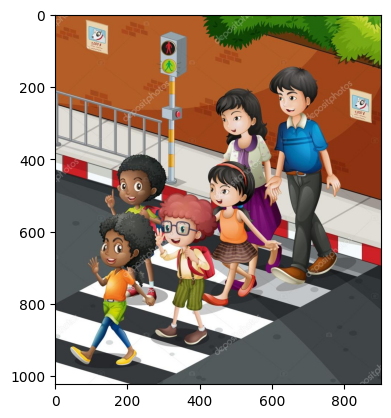

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load an image
img = mpimg.imread('/content/zebra crossing.jpg')

# Display the image
imgplot = plt.imshow(img)
plt.show()

#Marathi

## if you run this first with code, it will change audio into desired langauge but if we you run next it will overwrite the next operation.

In [ ]:
# usage
if __name__ == "__main__":
    # you have an image loaded (using any image processing library like PIL or OpenCV)
    from PIL import Image
    image = Image.open("/content/zebra crossing.jpg") #only runs .jpg images format

    # Assistive model processing
    assistive_model = AssistiveModel()

    # Specify the language code (e.g., 'hi' for Hindi, 'ta' for Tamil)
    assistive_model.process_image(image, lang_code='mr')

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption: a group of children standing on top of a street 
Translated Caption [mr_IN]: एका रस ् त ् यावर उभं राहणाऱ ् या मुलांचा एक गट
Audio saved to output.wav
Audio file saved: output.wav


In [ ]:
from IPython.display import Audio

# Play the output.wav file
Audio('output.wav')



---



#Telegu

In [ ]:
# usage
if __name__ == "__main__":
    # you have an image loaded (using any image processing library like PIL or OpenCV)
    from PIL import Image
    image = Image.open("/content/zebra crossing.jpg") #only runs .jpg images format

    # Assistive model processing
    assistive_model = AssistiveModel()

    # Specify the language code (e.g., 'hi' for Hindi, 'ta' for Tamil)
    assistive_model.process_image(image, lang_code='te')

/usr/local/lib/python3.10/dist-packages/transformers/models/vit/feature_extraction_vit.py:28: FutureWarning: The class ViTFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use ViTImageProcessor instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1258: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Caption: a group of children standing on top of a street 
Translated Caption [te_IN]: ఒక వీధి పైన నిలబడి పిల్లల గుంపు
Audio saved to output.wav
Audio file saved: output.wav


In [ ]:
from IPython.display import Audio

# Play the output.wav file
Audio('output.wav')